                  Title  Rental Count
0    BUCKET BROTHERHOOD            34
1      ROCKETEER MOTHER            33
2        FORWARD TEMPLE            32
3        JUGGLER HARDLY            32
4        GRIT CLOCKWORK            32
..                  ...           ...
953         SEVEN SWARM             5
954        HUNTER ALTER             5
955         MIXED DOORS             4
956      HARDLY ROBBERS             4
957         TRAIN BUNCH             4

[958 rows x 2 columns]
    First name Last name  Rental count
0      ELEANOR      HUNT            46
1         KARL      SEAL            45
2        CLARA      SHAW            42
3       MARCIA      DEAN            42
4        TAMMY   SANDERS            41
..         ...       ...           ...
594   CAROLINE    BOWMAN            15
595  KATHERINE    RIVERA            14
596      LEONA    OBRIEN            14
597    TIFFANY    JORDAN            14
598      BRIAN     WYMAN            12

[599 rows x 3 columns]


Text(0.5, 1.0, 'Rentals by Store')

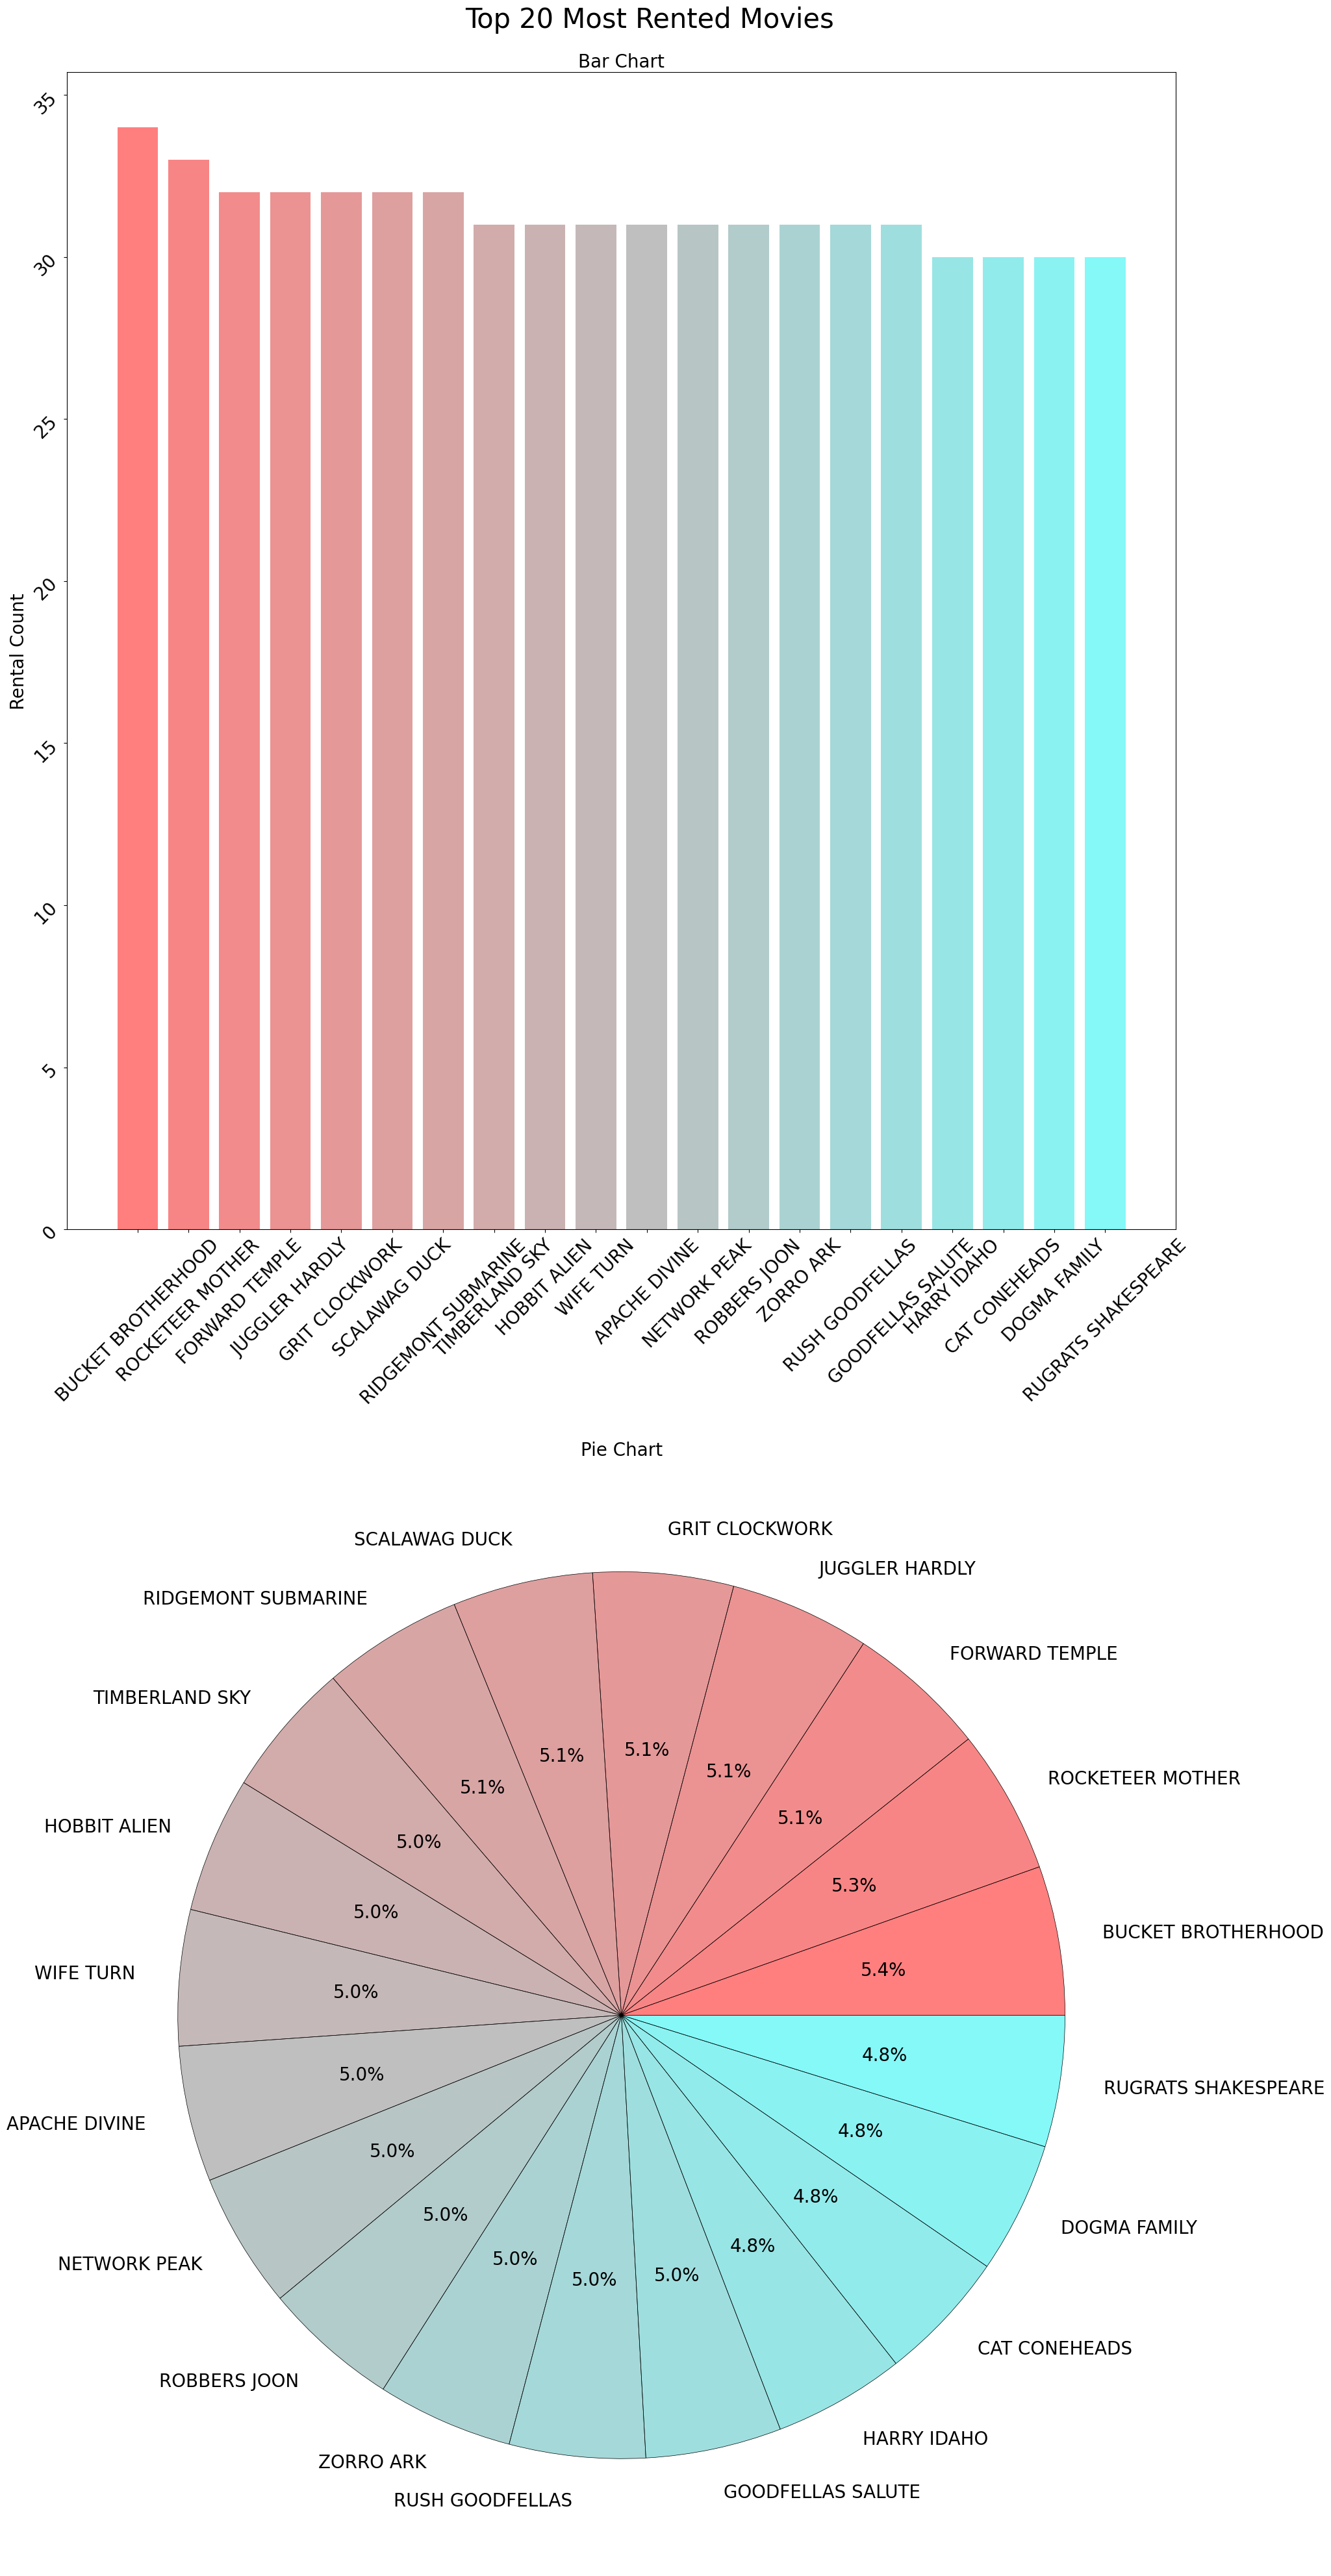

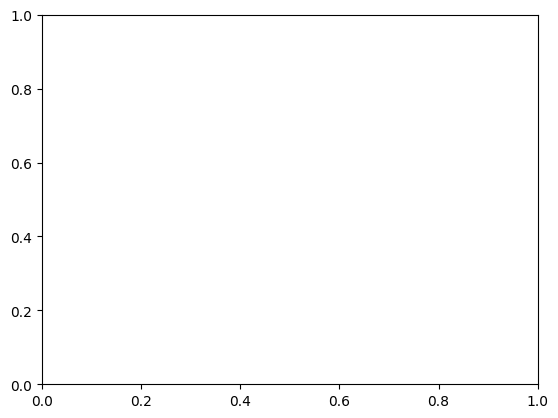

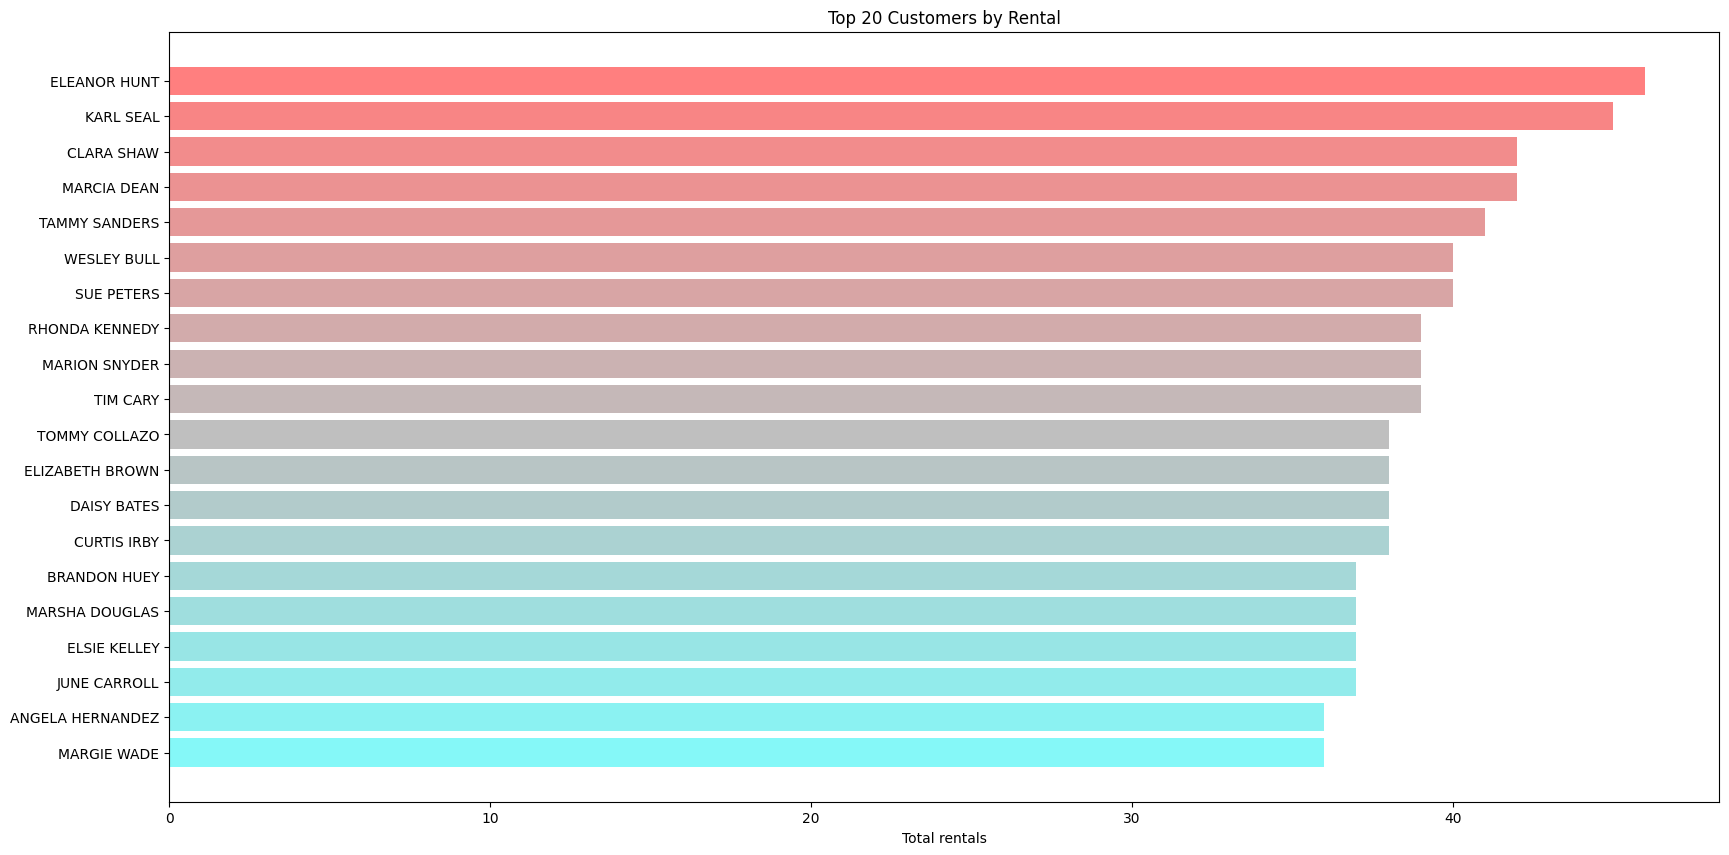

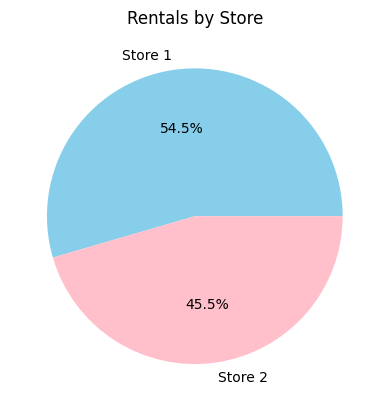

In [133]:
import psycopg2
import pandas as pd 
import matplotlib.pyplot as plt
conn = psycopg2.connect(dbname = "postgres",
                        user= "postgres",
                        password = "password",
                        host = "localhost",
                        port = "5432")

cursor = conn.cursor() #able to execute queries on DB

#most rented movie by title 
cursor.execute("""SELECT film.title, COUNT(rental.rental_id) as num_rentals 
               FROM film JOIN inventory ON film.film_id = inventory.film_id 
               JOIN rental on rental.inventory_id = inventory.inventory_id
                GROUP BY title
                ORDER BY num_rentals DESC""")
rows = cursor.fetchall() #return query results
movies_by_rentals = pd.DataFrame(rows)
movies_by_rentals.columns = ["Title", "Rental Count"]
titles = movies_by_rentals["Title"]
rentals = movies_by_rentals["Rental Count"]
clst = []
clength = len(titles[:20])
normalize = plt.Normalize(0, clength)
for i in range(clength):
    clst.append((1-normalize(i), normalize(i), normalize(i), 0.5))


fig, ax = plt.subplots(2, 1, figsize= (20, 40))
ax[0].bar(titles[:20], rentals[:20], color = clst)
ax[0].tick_params(labelrotation=45, labelsize = 20)
ax[0].set_ylabel("Rental Count", fontsize= 20)
ax[0].set_title("Bar Chart", fontsize = 20)

#pie chart
ax[1].pie(rentals[:20], labels = titles[:20], autopct='%1.1f%%', wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 0.5, 
                      'antialiased': True}, colors = clst, textprops={'fontsize' : 20})
plt.title("Pie Chart", fontsize = 20)
plt.suptitle("Top 20 Most Rented Movies", x = 0.5, y = 1, fontsize = 30)
plt.tight_layout()
# fig.subplots_adjust(top = 1, right = 0.8, left = 0.2, bottom = 0.2)
print(movies_by_rentals)

#customer with highest rentals
cursor.execute("""SELECT customer.first_name, customer.last_name, COUNT(rental_id) as rental_count 
	FROM rental JOIN customer ON customer.customer_id = rental.customer_id
	GROUP BY customer.customer_id
	ORDER BY rental_count DESC""")
rows = cursor.fetchall()
cust_by_rentals = pd.DataFrame(rows)
cust_by_rentals.columns = ["First name", "Last name", "Rental count"]
names = [f"{fname} {lname}" for fname, lname in zip(cust_by_rentals["First name"], cust_by_rentals["Last name"])]
rentals = cust_by_rentals["Rental count"]

#color gradient! YAY!! 
fig, ax = plt.subplots()
clst = []
lstlength = 20
normalize = plt.Normalize(0, lstlength)
for x in range(lstlength): 
    
    clst.append((1- normalize(x), normalize(x), normalize(x), 0.5))
 
fig, ax = plt.subplots(figsize= (20, 10))
ax.barh(names[0:20], rentals[:20], color = clst)
ax.invert_yaxis()
plt.title("Top 20 Customers by Rental")
plt.xlabel("Total rentals")

print(cust_by_rentals)

#rentals by store
cursor.execute("""SELECT customer.store_id, COUNT(rental.rental_id) AS num_rentals 
               FROM rental JOIN customer ON rental.customer_id = customer.customer_id
               GROUP BY customer.store_id""")
rows = cursor.fetchall()
rental_by_store = pd.DataFrame(rows)
rental_by_store.columns = ["Store ID", "Rentals"]

fig, ax = plt.subplots()
ax.pie(rental_by_store["Rentals"], labels = [(f"Store {x}") for x in rental_by_store["Store ID"]], autopct='%1.1f%%', colors = ['skyblue', 'pink'])
ax.set_title("Rentals by Store")
# cursor.execute("SELECT film_id, title, description, release_year, length, rating, fulltext FROM film")
# rows = cursor.fetchall()
# film_df = pd.DataFrame(rows)
# film_df.columns = "film_id, title, description, release_year, length, rating, fulltext".split(", ")
# print(film_df)

# cursor.execute("SELECT actor.actor_id as id, actor.first_name, actor.last_name, address.phone FROM actor JOIN address on actor_id = address_id")
# rows = cursor.fetchall()
# actor_df = pd.DataFrame(rows)
# actor_df.columns = "id, first_name, last_name, phone".split(", ")
# print(actor_df)

# cursor.execute("SELECT ")